In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("rplidar_data_ceiling_1h.csv", delimiter=",")
data

,index,time,data
0,0,1598235552207058179,1901
1,1,1598235552215085790,1901
2,2,1598235552224730364,1902
3,3,1598235552234334821,1901
4,4,1598235552243948042,1901
...,...,...,...
41577,41577,1598235912119067533,1899
41578,41578,1598235912119110281,1896
41579,41579,1598235912162757004,1899
41580,41580,1598235912162832916,1899


In [4]:
print(data["data"])

0        1901
1        1901
2        1902
3        1901
4        1901
         ... 
41577    1899
41578    1896
41579    1899
41580    1899
41581    1899
Name: data, Length: 41582, dtype: int64


In [15]:
data_hit = data[data["data"] != 6000]
data_hit = data_hit[data_hit["data"] > 1000]

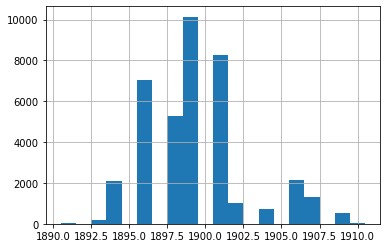

In [31]:
data_hit["data"].hist(bins=max(data_hit["data"])-min(data_hit["data"]), align='left')
plt.show()

In [44]:
mean = data_hit["data"].mean()
var = data_hit["data"].var()

import math

stddev = math.sqrt(var)

print(mean)
print(var)
print(stddev)

1899.4045392482676
11.009339452402495
3.318032467050691


In [54]:
freqs = pd.DataFrame(data_hit["data"].value_counts())
freqs.transpose()
freqs["probs"] = freqs["data"]/len(data_hit["data"])
freqs["probs"].sort_index()
freqs.transpose()

,1899,1901,1896,1898,1906,1894,1907,1902,1904,1909,1893,1891,1911
data,10144.000000,8255.000000,7057.000000,5298.000000,2163.000000,2108.000000,1312.0000,1002.000000,731.000000,508.000000,198.000000,24.000000,17.000000
probs,0.261329,0.212665,0.181802,0.136487,0.055723,0.054306,0.0338,0.025813,0.018832,0.013087,0.005101,0.000618,0.000438


In [58]:
sum(freqs["probs"])

1.0

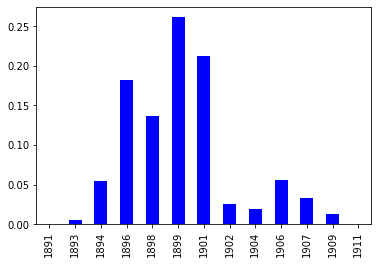

In [59]:
freqs["probs"].sort_index().plot.bar(color="blue")
plt.show()

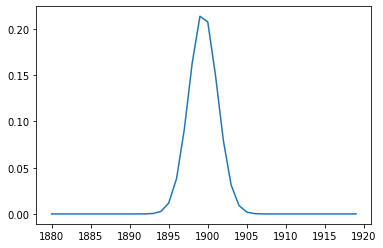

In [61]:
def p(z, mu=1899.4045392482676, dev=3.318032467050691):   ###pdf_from_def###
    return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

zs = range(1880, 1920)
ys = [p(z) for z in zs]

plt.plot(zs, ys)
plt.show()

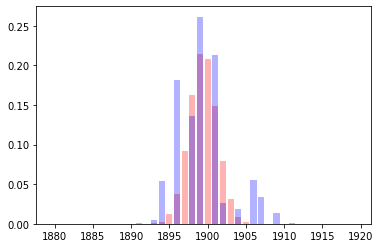

In [57]:
plt.bar(zs, ys, color="red", alpha=0.3)
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()